In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

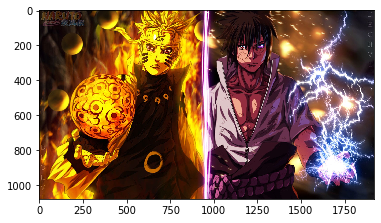

In [31]:
img = cv.imread("./naruto.jpg")
#img is in bgr format..convert to rgb
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
print(img.shape)

(1080, 1920, 3)


In [7]:
#flatten each channel
pixels = img.reshape((img.shape[0]*img.shape[1],3))

In [8]:
print(pixels.shape)

(2073600, 3)


In [9]:
from sklearn.cluster import KMeans

In [11]:
dominant_colors = 4
km = KMeans(n_clusters = dominant_colors)
km.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
centers = km.cluster_centers_

In [33]:
#centers is a float value...convert it to int as all pixels are integer values
centers = np.array(centers,dtype = 'uint8')

In [34]:
print(centers)

[[127  65  55]
 [235 171  14]
 [217 197 212]
 [ 39  18  18]]


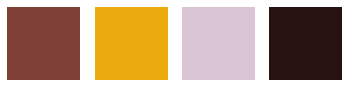

In [35]:
#plot all centers
i=1
colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    colors.append(each_col)
    #color swatch
    c = np.zeros((100,100,3),dtype = 'uint8')
    c[:,:,:] = each_col
    plt.imshow(c)
    i+=1
    

In [36]:
#segmenting original image


In [37]:
new_img = np.zeros((img.shape[0]*img.shape[1],3),dtype = 'uint8')

In [38]:
a = km.labels_

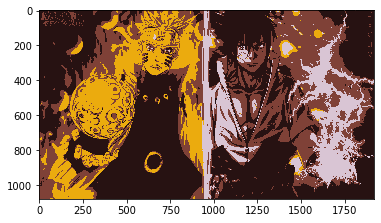

In [39]:
for px in range(new_img.shape[0]):
    new_img[px] = colors[a[px]]
new_img = new_img.reshape((img.shape))
plt.imshow(new_img)
plt.show()


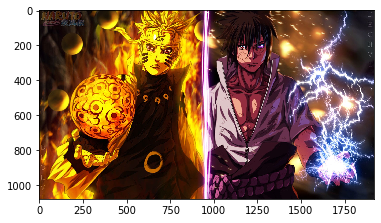

In [30]:
plt.imshow(img)   
plt.show()